In [130]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [131]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz 

# 데이터 경로
file_path = "/gdrive/MyDrive/colab/dt/PlayTennis.csv"
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path)

# 데이터 출력 (데이터 형태 확인)
print(datas)

     outlook  temp humidity  windy play  day      time
0      sunny   hot     high  False   no  Tue  12-34-11
1      sunny   hot     high   True   no  Mon  13-32-42
2   overcast   hot     high  False  yes  Sun  02-13-55
3      rainy  mild     high  False  yes  Sun  09-58-03
4      rainy  cool   normal  False  yes  Sat  09-42-00
5      rainy  cool   normal   True   no  Fri  20-11-58
6   overcast  cool   normal   True  yes  Sat  12-08-59
7      sunny  mild     high  False   no  Wed  16-48-02
8      sunny  cool   normal  False  yes  Sun  16-55-11
9      rainy  mild   normal  False  yes  Sun  07-12-32
10     sunny  mild   normal   True  yes  Wed  14-22-40
11  overcast  mild     high   True  yes  Sat  17-08-32
12  overcast   hot   normal  False  yes  Fri  19-11-52
13     rainy  mild     high   True   no  Thu  10-55-10


In [132]:
# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리
label_encoder = LabelEncoder()

# 요일 레이블링
def label_day(day):
  weekday = {'Mon', 'Tue', 'Wed', 'Thu', 'Fri'}

  if day in weekday:
    # 평일
    return 0;
  else:
    # 주말
    return 1;

# 시간 레이블링
def label_time(hour):
  # 정수로 변환
  hour = int(hour)

  # 새벽
  if 0 < hour < 6:
    return 0;
  # 오전
  elif hour < 12:
    return 1;
  # 오후
  elif hour < 18:
    return 2;
  # 밤  
  elif hour < 24:
    return 3;




# 정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['play'] = label_encoder.fit_transform(datas['play'])

# 요일, 시간 전처리
datas['day'] = label_encoder.fit_transform(datas['day'].apply(lambda x: label_day(x)))
datas['time'] = label_encoder.fit_transform(datas['time'].apply(lambda x: label_time(x.split('-')[0])))

# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  play  day  time
0         2     1         0      0     0    0     2
1         2     1         0      1     0    0     2
2         0     1         0      0     1    1     0
3         1     2         0      0     1    1     1
4         1     0         1      0     1    1     1
5         1     0         1      1     0    0     3
6         0     0         1      1     1    1     2
7         2     2         0      0     0    0     2
8         2     0         1      0     1    1     2
9         1     2         1      0     1    1     1
10        2     2         1      1     1    0     2
11        0     2         0      1     1    1     2
12        0     1         1      0     1    0     3
13        1     2         0      1     0    0     1


In [133]:
# 입력 데이터와 정답 데이터로 분리
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

# 분리 결과 확인
print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    0     2
1         2     1         0      1    0     2
2         0     1         0      0    1     0
3         1     2         0      0    1     1
4         1     0         1      0    1     1
5         1     0         1      1    0     3
6         0     0         1      1    1     2
7         2     2         0      0    0     2
8         2     0         1      0    1     2
9         1     2         1      0    1     1
10        2     2         1      1    0     2
11        0     2         0      1    1     2
12        0     1         1      0    0     3
13        1     2         0      1    0     1

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [134]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

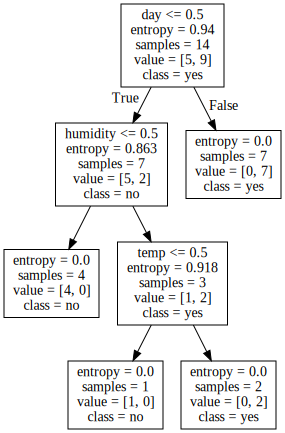

In [135]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names)) 
graph

In [136]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(x_data)

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


* 엑셀의 요일을 평일과 주말 클래스로 분리
* 엑셀의 시간(HH-MM-SS)을 구분자 '-'로 분리하여 HH를 사용하여 새벽, 오전, 오후, 밤 4구간으로 분리
* 2개의 전처리를 거쳐 입력으로 넣었음